# Problem Statement

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Downloads/crime_data (1).csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df= df.drop(columns='Unnamed: 0')
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [4]:
#Data description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.duplicated().sum()

0

In [7]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

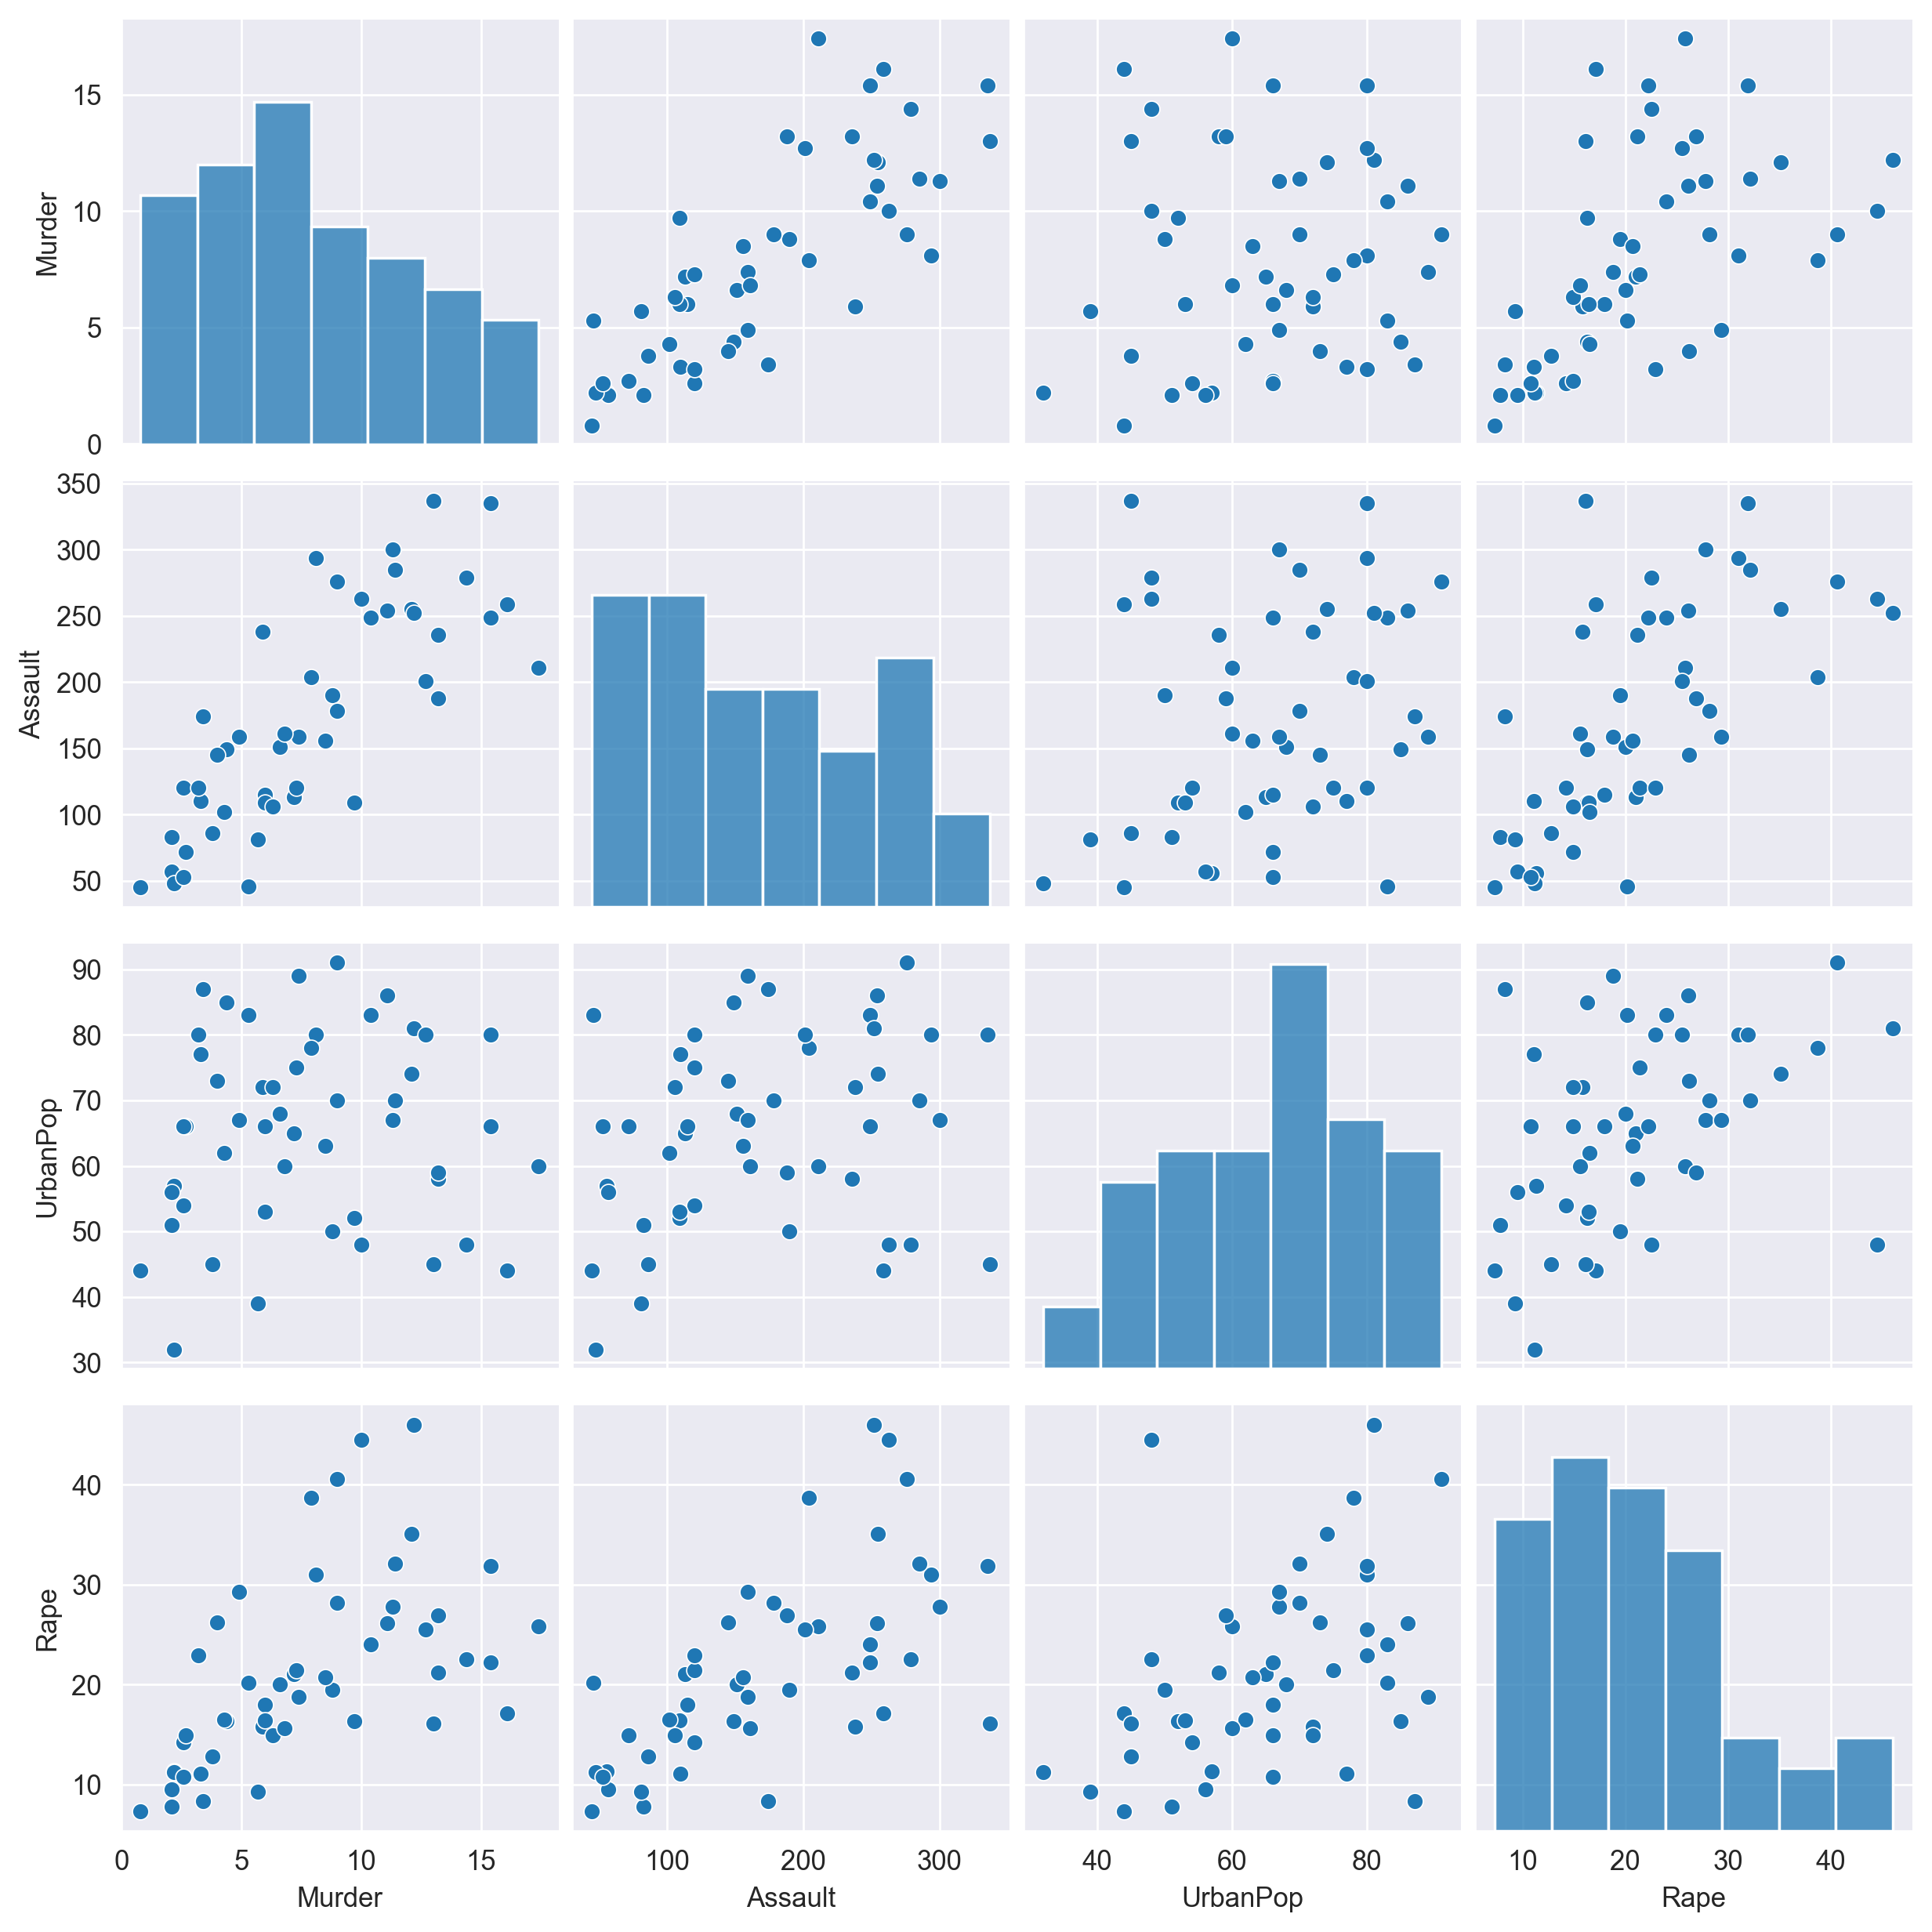

In [8]:
sns.pairplot(df)

# Feature Scaling

In [9]:
from sklearn.preprocessing import normalize

In [10]:
df_norm=pd.DataFrame(normalize(df),columns=df.columns)

In [11]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [12]:
from scipy.cluster import hierarchy

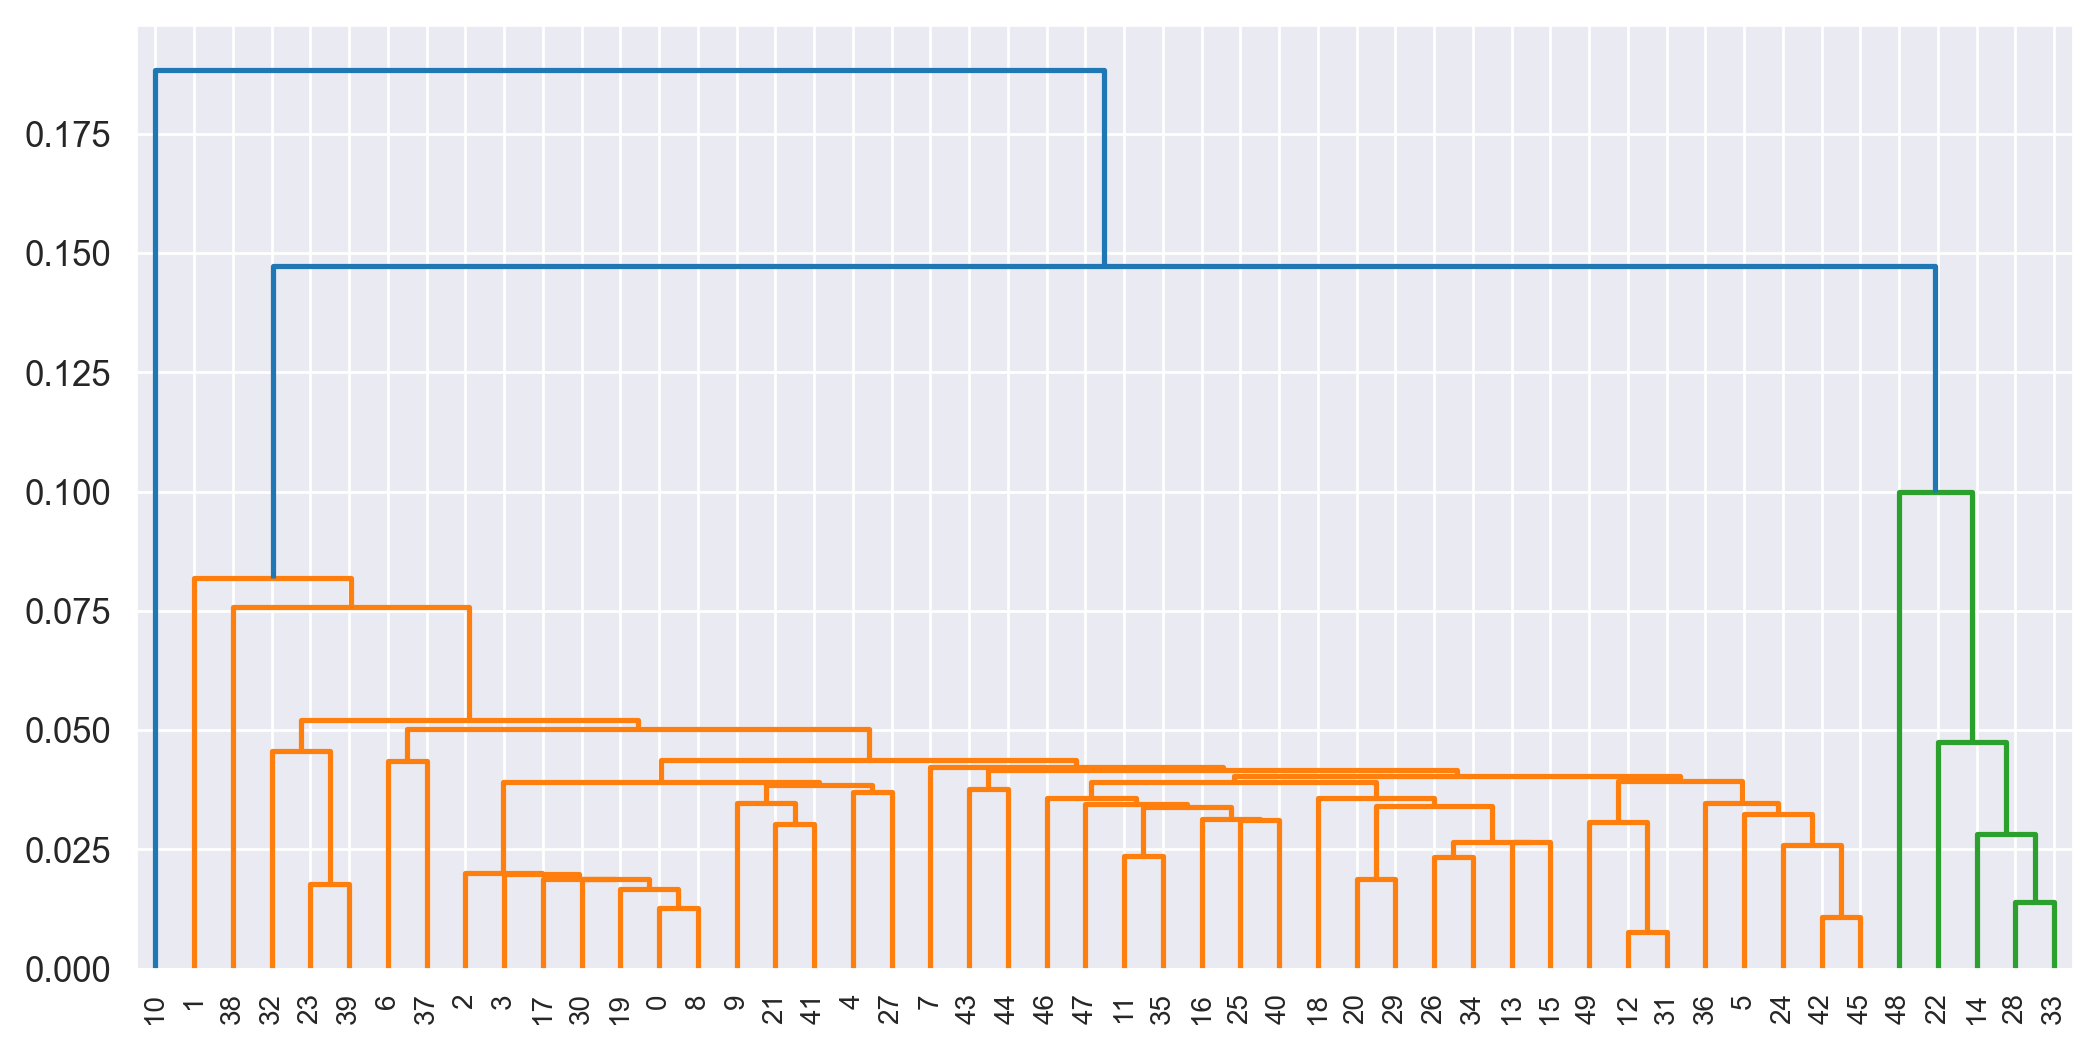

In [13]:
lk= hierarchy.linkage(df_norm, method='single')
dendo= hierarchy.dendrogram(lk)

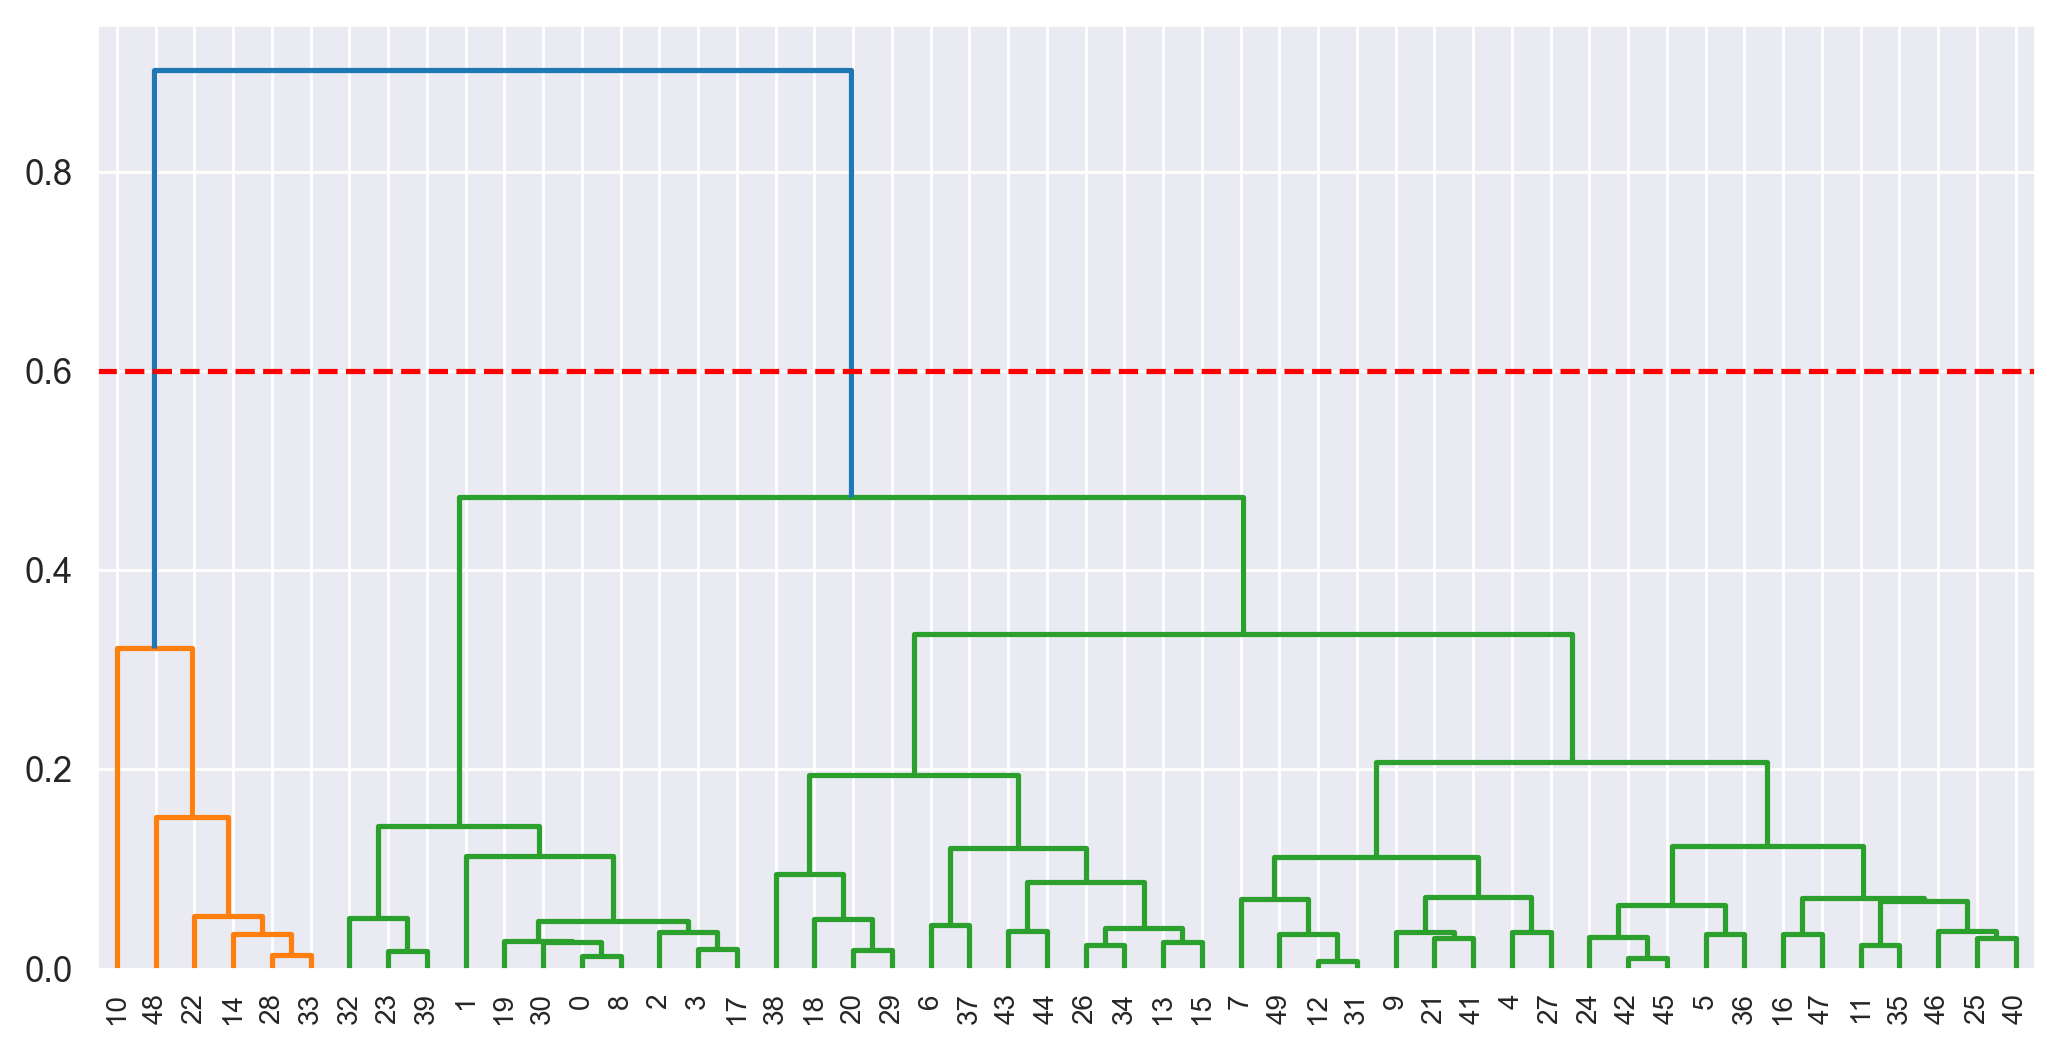

In [14]:
lk= hierarchy.linkage(df_norm, method='complete')
dendo= hierarchy.dendrogram(lk)
plt.axhline(y=0.6, c='red', linestyle='--' )

# Model Building

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc= AgglomerativeClustering(n_clusters=4)

y=hc.fit_predict(df_norm)

In [18]:
y

array([2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 0, 3, 2, 1, 0, 1, 3, 2, 1, 2, 1, 2,
       0, 2, 3, 3, 1, 2, 0, 1, 2, 2, 2, 0, 1, 3, 3, 1, 1, 2, 3, 2, 3, 1,
       1, 3, 3, 3, 0, 2], dtype=int64)

In [19]:
df['Cluster']=y
df 

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [20]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,2.616667,54.833333,62.000000,12.333333
1,4.758333,116.583333,70.083333,15.683333
2,11.760000,255.550000,66.100000,27.090000
3,6.783333,141.583333,61.833333,21.466667


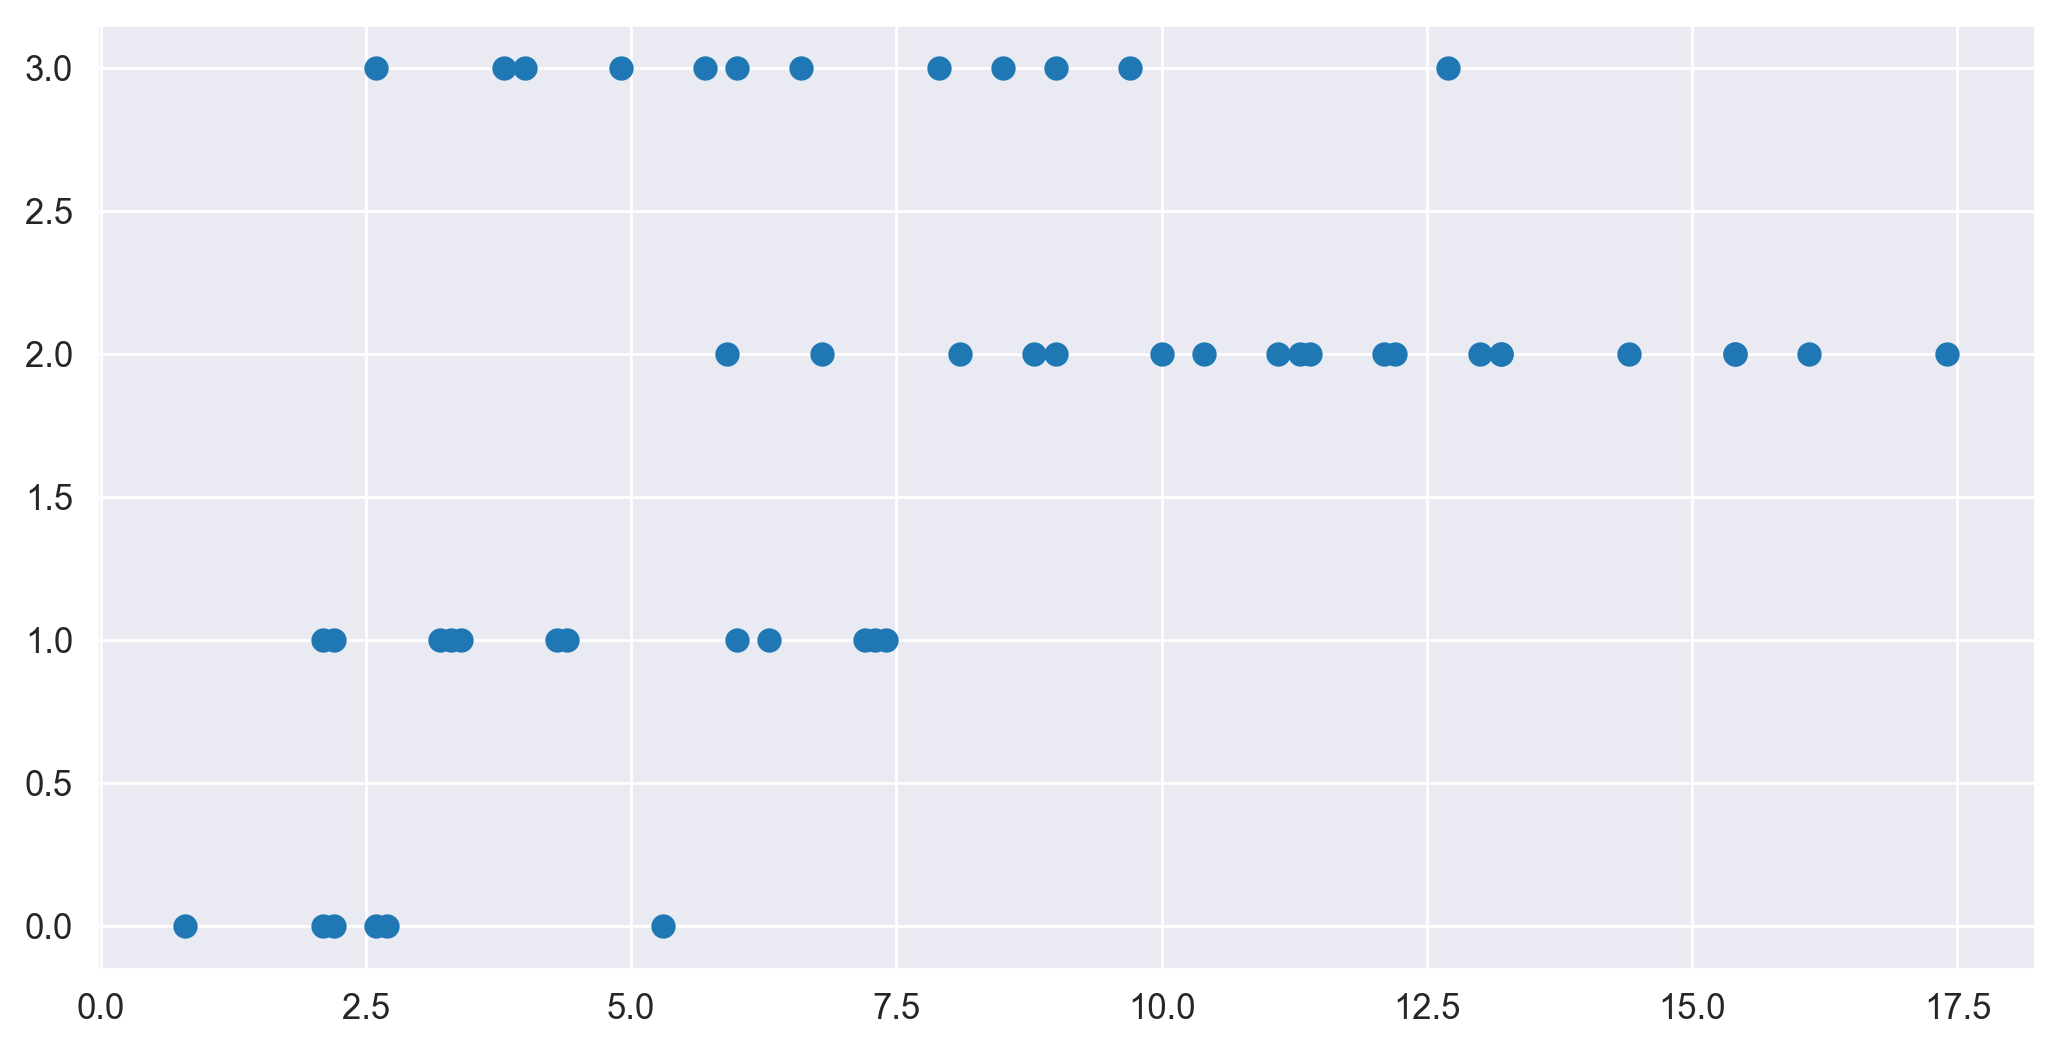

In [21]:
plt.scatter(df['Murder'],df['Cluster'])

# K-Means

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

x= sc.fit_transform(df)
x 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.25264558],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.25264558],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.25264558],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.25264558],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.25264558],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.30533548],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.80004433],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.25264558],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.25264558],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.25264558],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.85273423],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.30533548],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.25264558],
       [-0.13637203, -0.70012057, -0.0

In [24]:
df_sc=pd.DataFrame(x ,columns=df.columns)
df_sc

,Murder,Assault,UrbanPop,Rape,Cluster
0,1.255179,0.790787,-0.526195,-0.003451,0.252646
1,0.513019,1.118060,-1.224067,2.509424,0.252646
2,0.072361,1.493817,1.009122,1.053466,0.252646
3,0.234708,0.233212,-1.084492,-0.186794,0.252646
4,0.281093,1.275635,1.776781,2.088814,0.252646
5,0.025976,0.402909,0.869548,1.883901,1.305335
6,-1.040880,-0.736484,0.799761,-1.092723,-0.800044
7,-0.437875,0.815030,0.450825,-0.585834,0.252646
8,1.765415,1.990786,1.009122,1.150530,0.252646
9,2.229265,0.487757,-0.386621,0.492653,0.252646


In [25]:
km= KMeans()
y= km.fit_predict(x)
y 

array([6, 5, 1, 2, 1, 5, 0, 2, 1, 6, 0, 3, 1, 0, 4, 0, 3, 6, 4, 1, 0, 1,
       4, 6, 7, 3, 0, 5, 4, 0, 1, 1, 6, 4, 0, 7, 7, 0, 0, 6, 3, 6, 1, 0,
       4, 7, 7, 3, 4, 2])

In [26]:
df1 = pd.DataFrame(x, columns=df.columns)
df1['cluster'] = y
df1

,Murder,Assault,UrbanPop,Rape,Cluster,cluster
0,1.255179,0.790787,-0.526195,-0.003451,0.252646,6
1,0.513019,1.118060,-1.224067,2.509424,0.252646,5
2,0.072361,1.493817,1.009122,1.053466,0.252646,1
3,0.234708,0.233212,-1.084492,-0.186794,0.252646,2
4,0.281093,1.275635,1.776781,2.088814,0.252646,1
5,0.025976,0.402909,0.869548,1.883901,1.305335,5
6,-1.040880,-0.736484,0.799761,-1.092723,-0.800044,0
7,-0.437875,0.815030,0.450825,-0.585834,0.252646,2
8,1.765415,1.990786,1.009122,1.150530,0.252646,1
9,2.229265,0.487757,-0.386621,0.492653,0.252646,6


In [27]:
km.cluster_centers_

array([[-0.58124676, -0.62188373,  0.76169507, -0.43288514, -0.89574341],
       [ 0.80936747,  1.2284972 ,  0.93933509,  0.99474862,  0.36961112],
       [-0.14410287,  0.30997952, -0.34009606, -0.46001072,  0.25264558],
       [-0.51672938, -0.84557499, -1.18219439, -0.80153166,  1.30533548],
       [-1.31919063, -1.35293383, -0.86516132, -1.16821729, -1.55196568],
       [ 0.52074942,  0.83523156,  0.24146355,  2.35484076,  0.60354221],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ,  0.25264558],
       [-0.27552716, -0.15709077,  0.18563383,  0.39343212,  1.30533548]])

# Elbow Graph

In [28]:
wcss=[]

for i in range (1,21):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [29]:
wcss

[250.00000000000003,
 146.59667240138612,
 106.7341293240855,
 85.34613800437592,
 65.2534236624095,
 55.65427329555189,
 51.0256325590868,
 44.611100577235774,
 41.4729478471032,
 38.53166374971852,
 34.7110073106306,
 31.449438181156,
 28.23593222864786,
 24.69858884208385,
 22.099758816437507,
 20.462156242512968,
 19.594343086690866,
 17.39984606721868,
 16.58413269040146,
 15.788619061757927]

Text(0.5, 1.0, 'Elbow Curve')

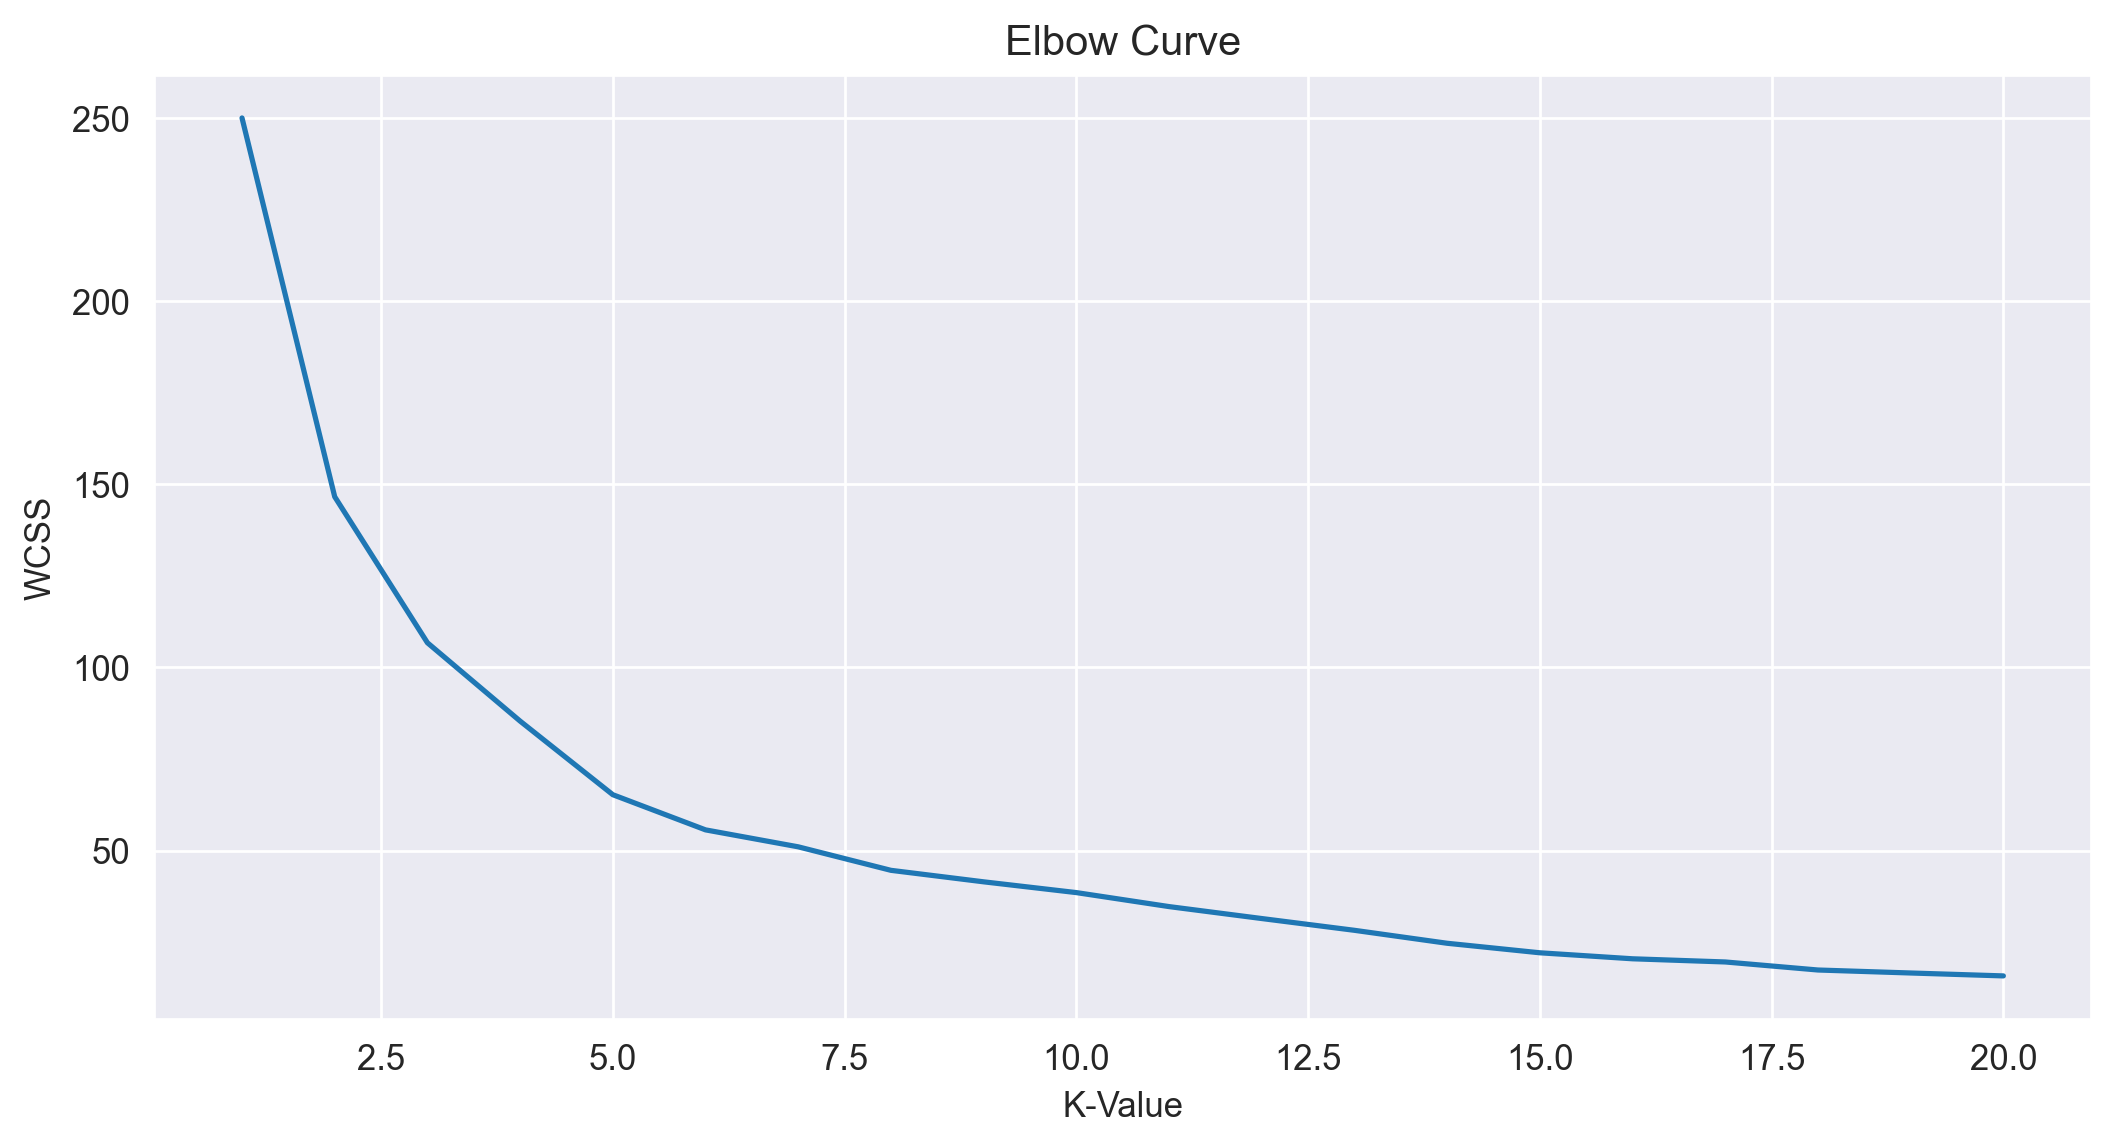

In [30]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

# Final Model

In [31]:
km= KMeans(n_clusters=4)
y=km.fit_predict(x)
y 

array([3, 0, 0, 1, 0, 0, 2, 1, 0, 3, 2, 1, 0, 2, 2, 2, 1, 3, 2, 0, 2, 0,
       2, 3, 0, 1, 2, 0, 2, 2, 0, 0, 3, 2, 2, 1, 1, 2, 2, 3, 1, 3, 0, 2,
       2, 1, 1, 1, 2, 1])

In [32]:
df['Cluster']=y
df.head(5)

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


In [33]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,10.815385,257.384615,76.000000,33.192308
1,6.108333,142.083333,58.000000,18.008333
2,4.044444,96.000000,67.388889,14.566667
3,14.671429,251.285714,54.285714,21.685714


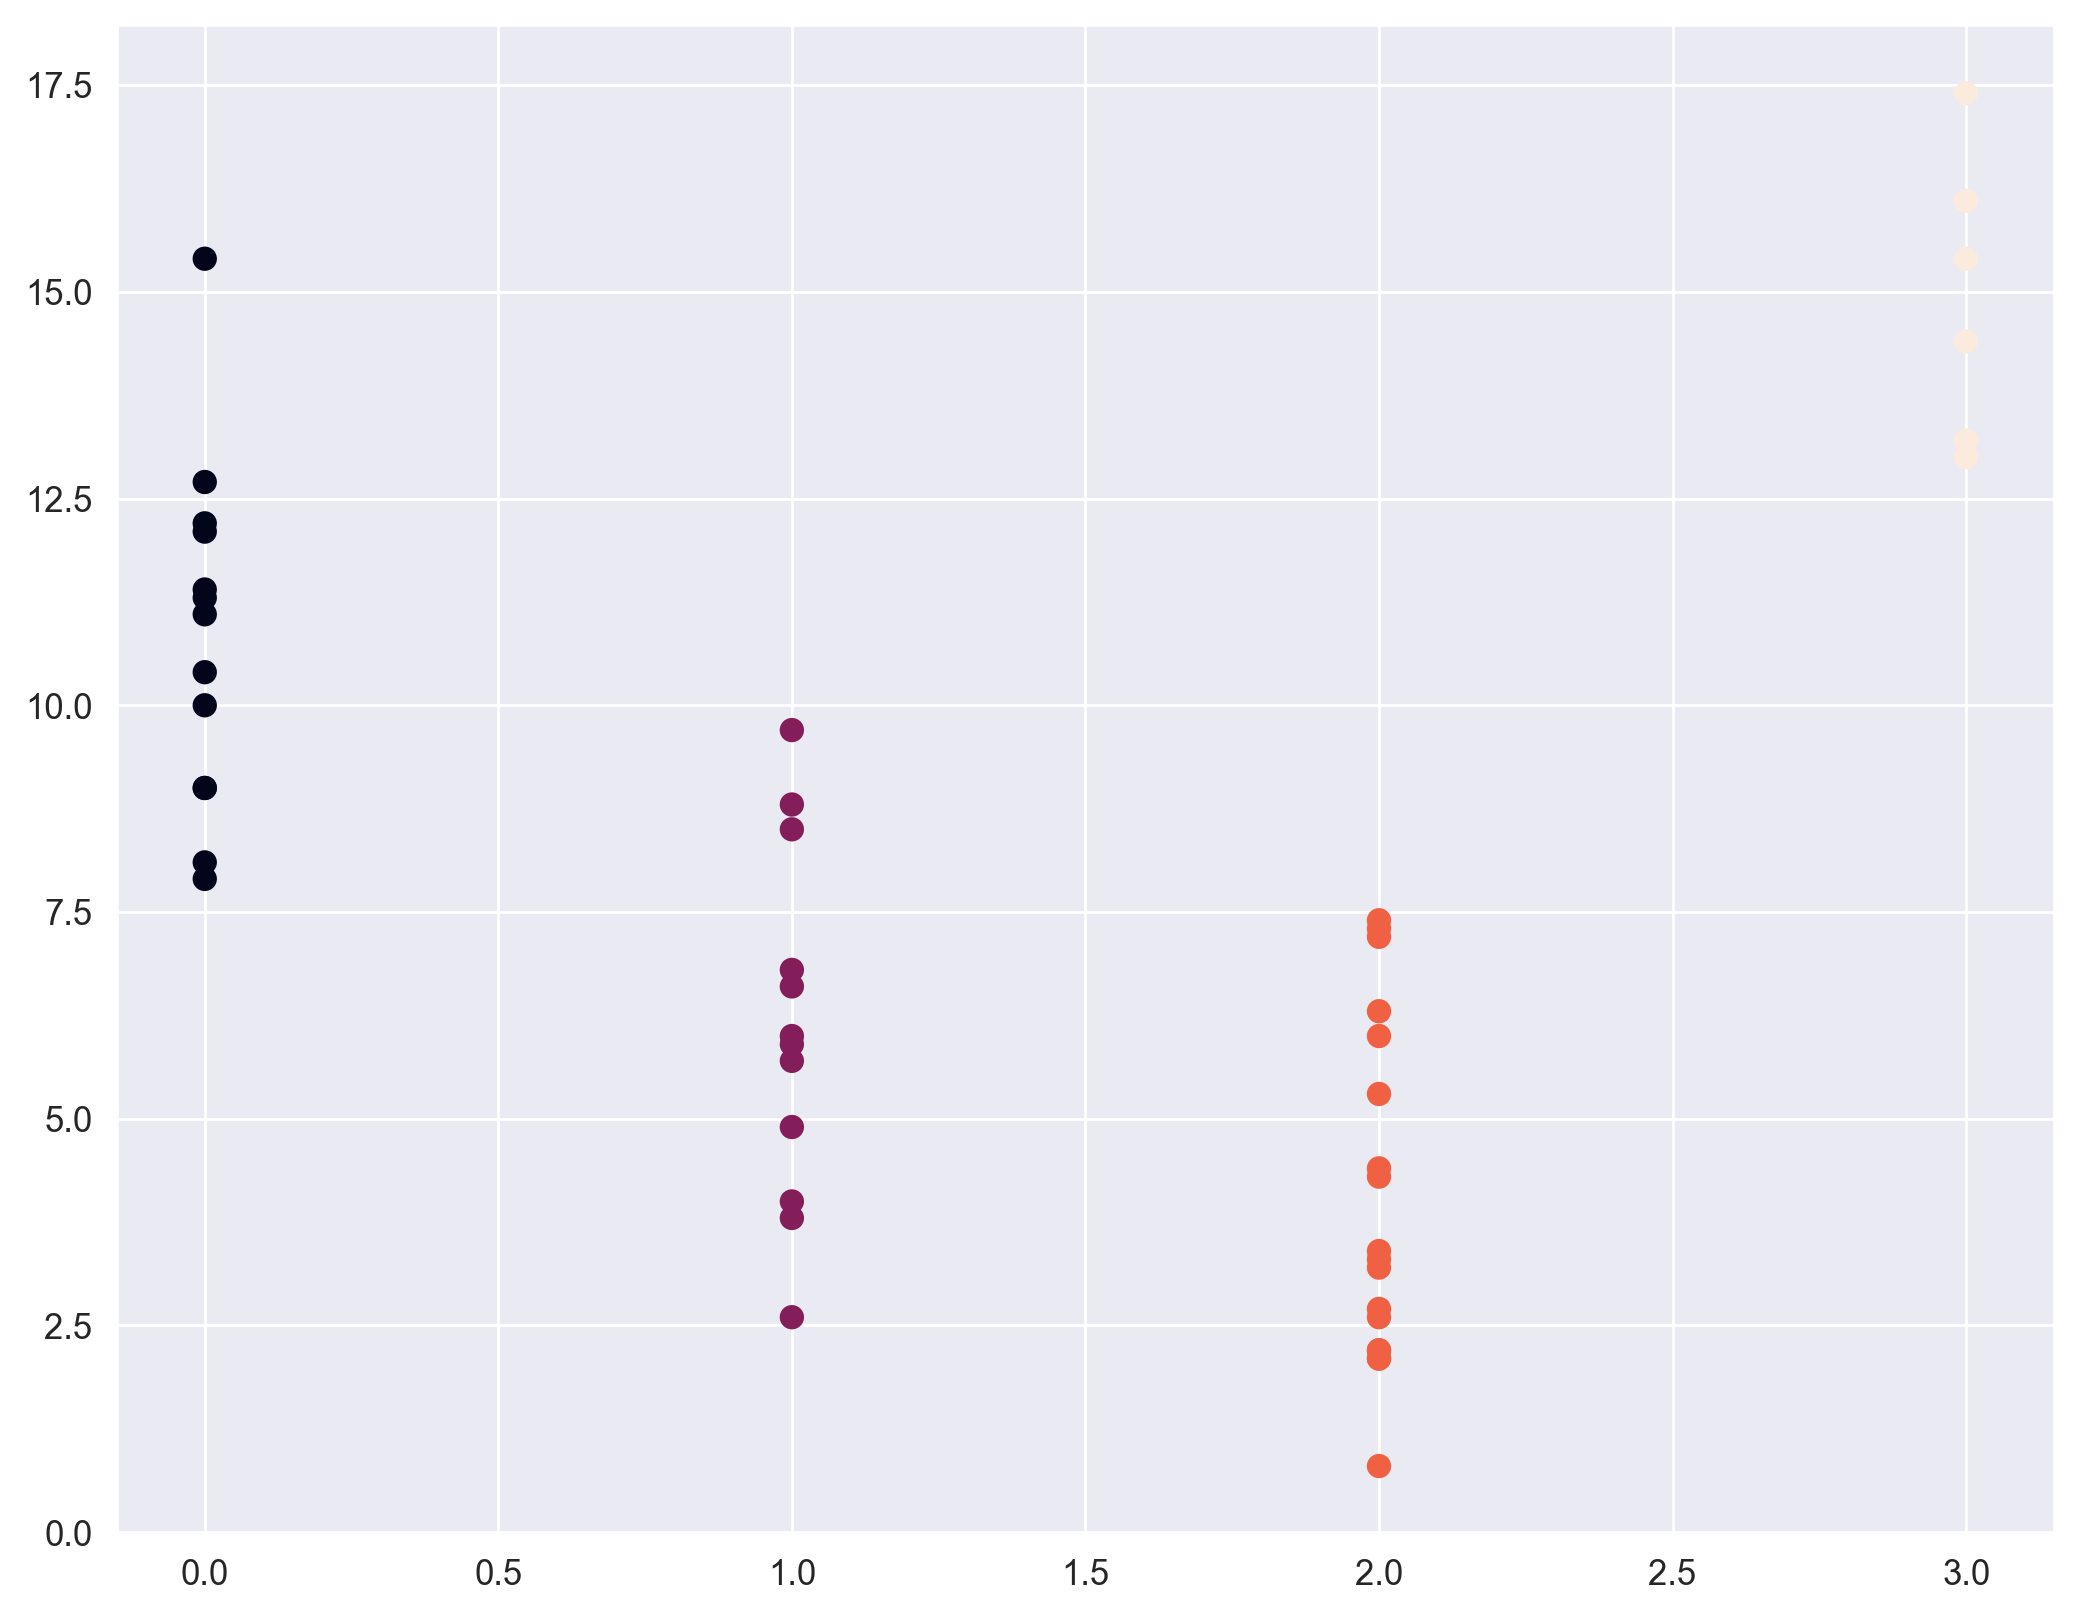

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(df['Cluster'], df['Murder'], c=km.labels_)

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(x,y)

0.3363655655774563

In [41]:
!pip install yellowbrick

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

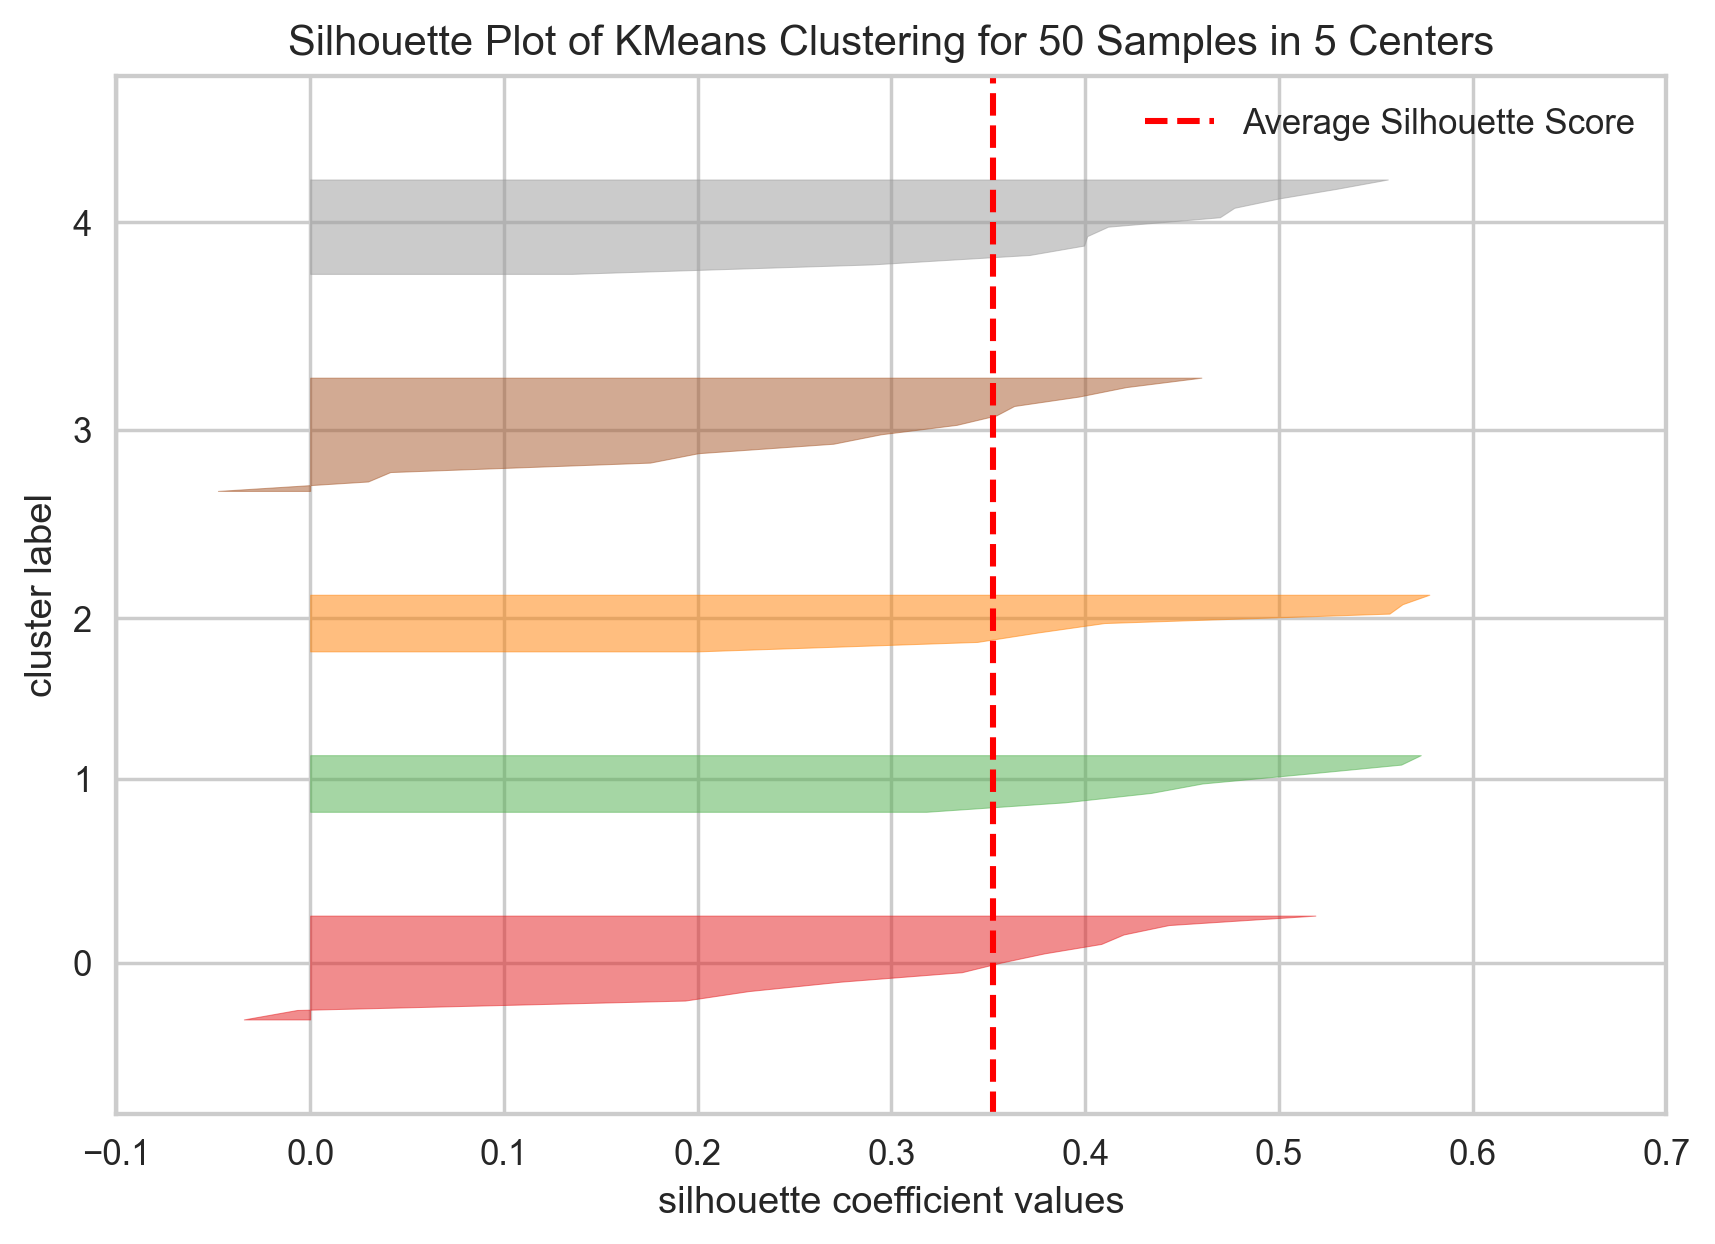

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
model = KMeans(n_clusters=5)
vis = SilhouetteVisualizer(model)

vis.fit(x)
vis.show()

# DB Scan

In [44]:
from sklearn.cluster import DBSCAN

# Model Building

In [45]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.25264558],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.25264558],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.25264558],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.25264558],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.25264558],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.30533548],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.80004433],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.25264558],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.25264558],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.25264558],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.85273423],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.30533548],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.25264558],
       [-0.13637203, -0.70012057, -0.0

In [46]:
db = DBSCAN(eps=1, min_samples=4)
y = db.fit_predict(x)
y

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  4, -1,  1,  2,  1,  4,
        0, -1, -1,  3, -1,  2, -1, -1,  4,  1, -1,  2,  3, -1, -1, -1,  2,
        1, -1, -1,  1,  3,  0,  4,  0, -1,  3, -1, -1, -1,  4,  2, -1],
      dtype=int64)

In [47]:
silhouette_score(x,y)

0.0828899468719075

In [48]:
df['Cluster']=y
df

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [49]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,9.315385,212.692308,67.538462,26.030769
0,14.050000,238.000000,57.750000,23.200000
1,5.733333,111.000000,69.500000,17.150000
2,2.080000,56.600000,57.800000,10.760000
3,4.600000,150.500000,85.250000,16.575000
4,5.560000,101.000000,48.600000,13.800000


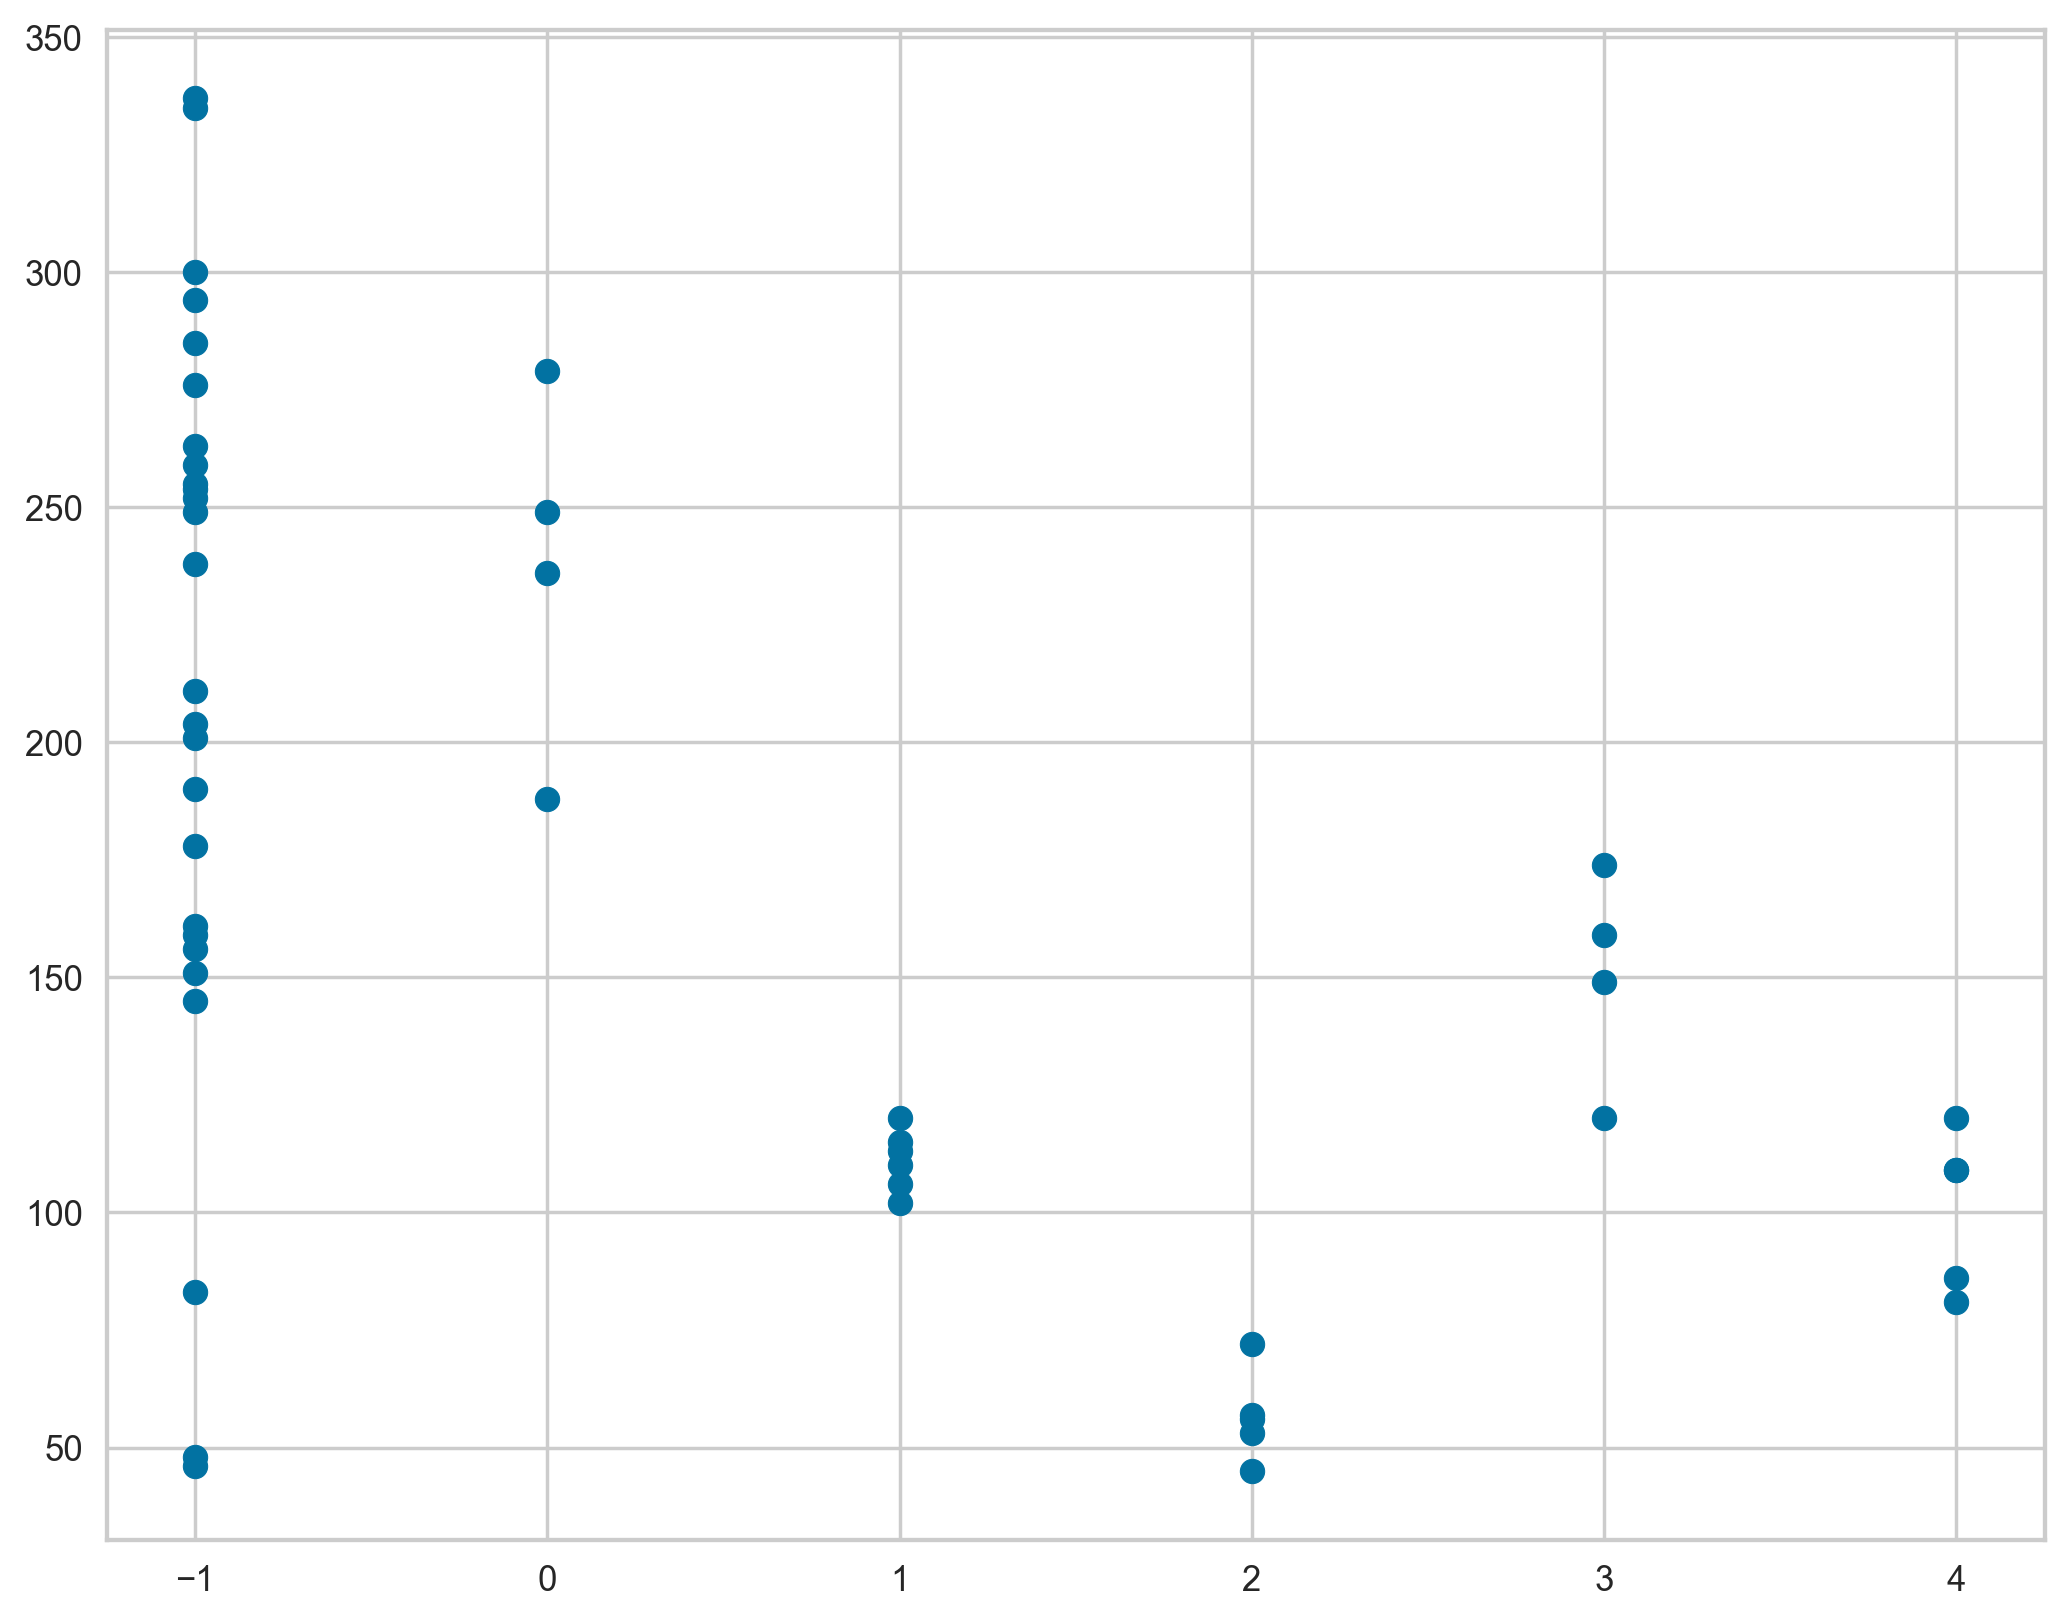

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(df['Cluster'], df['Assault'])